# Neurônios artificiais

Os neurônios são células nervosas interconectadas no cérebro que estão envolvidas no processamento e transmissão de sinais químicos e elétricos, como ilustrado na figura a seguir:


<div>
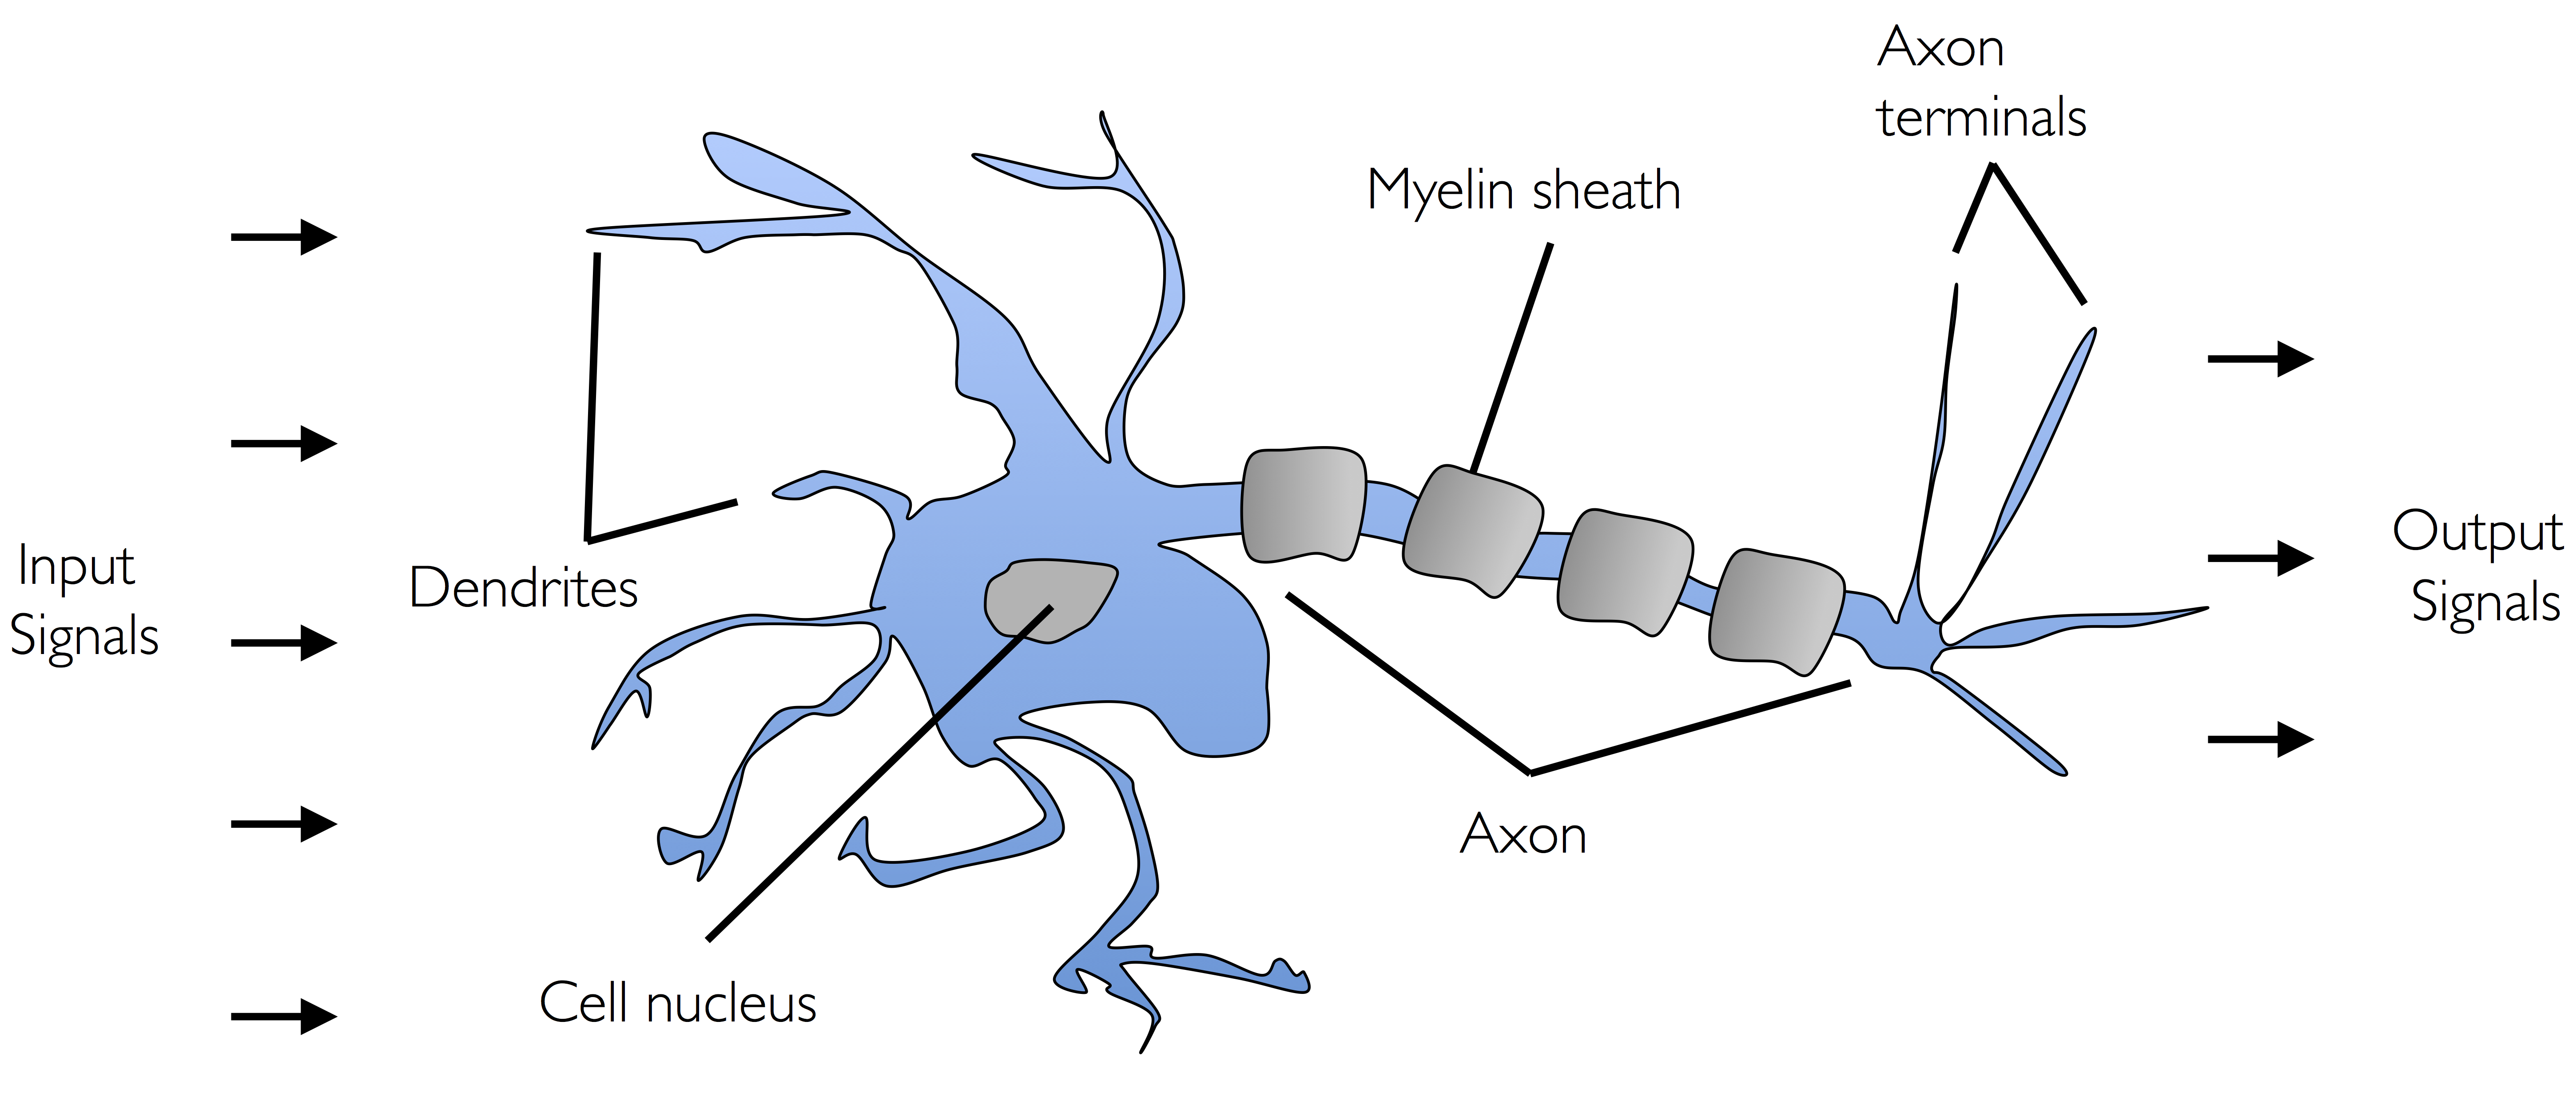
</div>

## Definindo um neurônio artificial

Mais formalmente, podemos colocar a ideia por trás dos neurônios artificiais no contexto de uma tarefa de classificação binária onde nos referimos às nossas duas classes como 1 (classe positiva) e -1 (classe negativa) para simplificar. Podemos então definir uma função de decisão (φ (z)) que leva uma combinação linear de certos valores de entrada x e um peso correspondente vetor w, onde z é a chamada entrada da rede  $z =  w_1 \times x_1+ \dots + w_m \times x_m$:


<div>
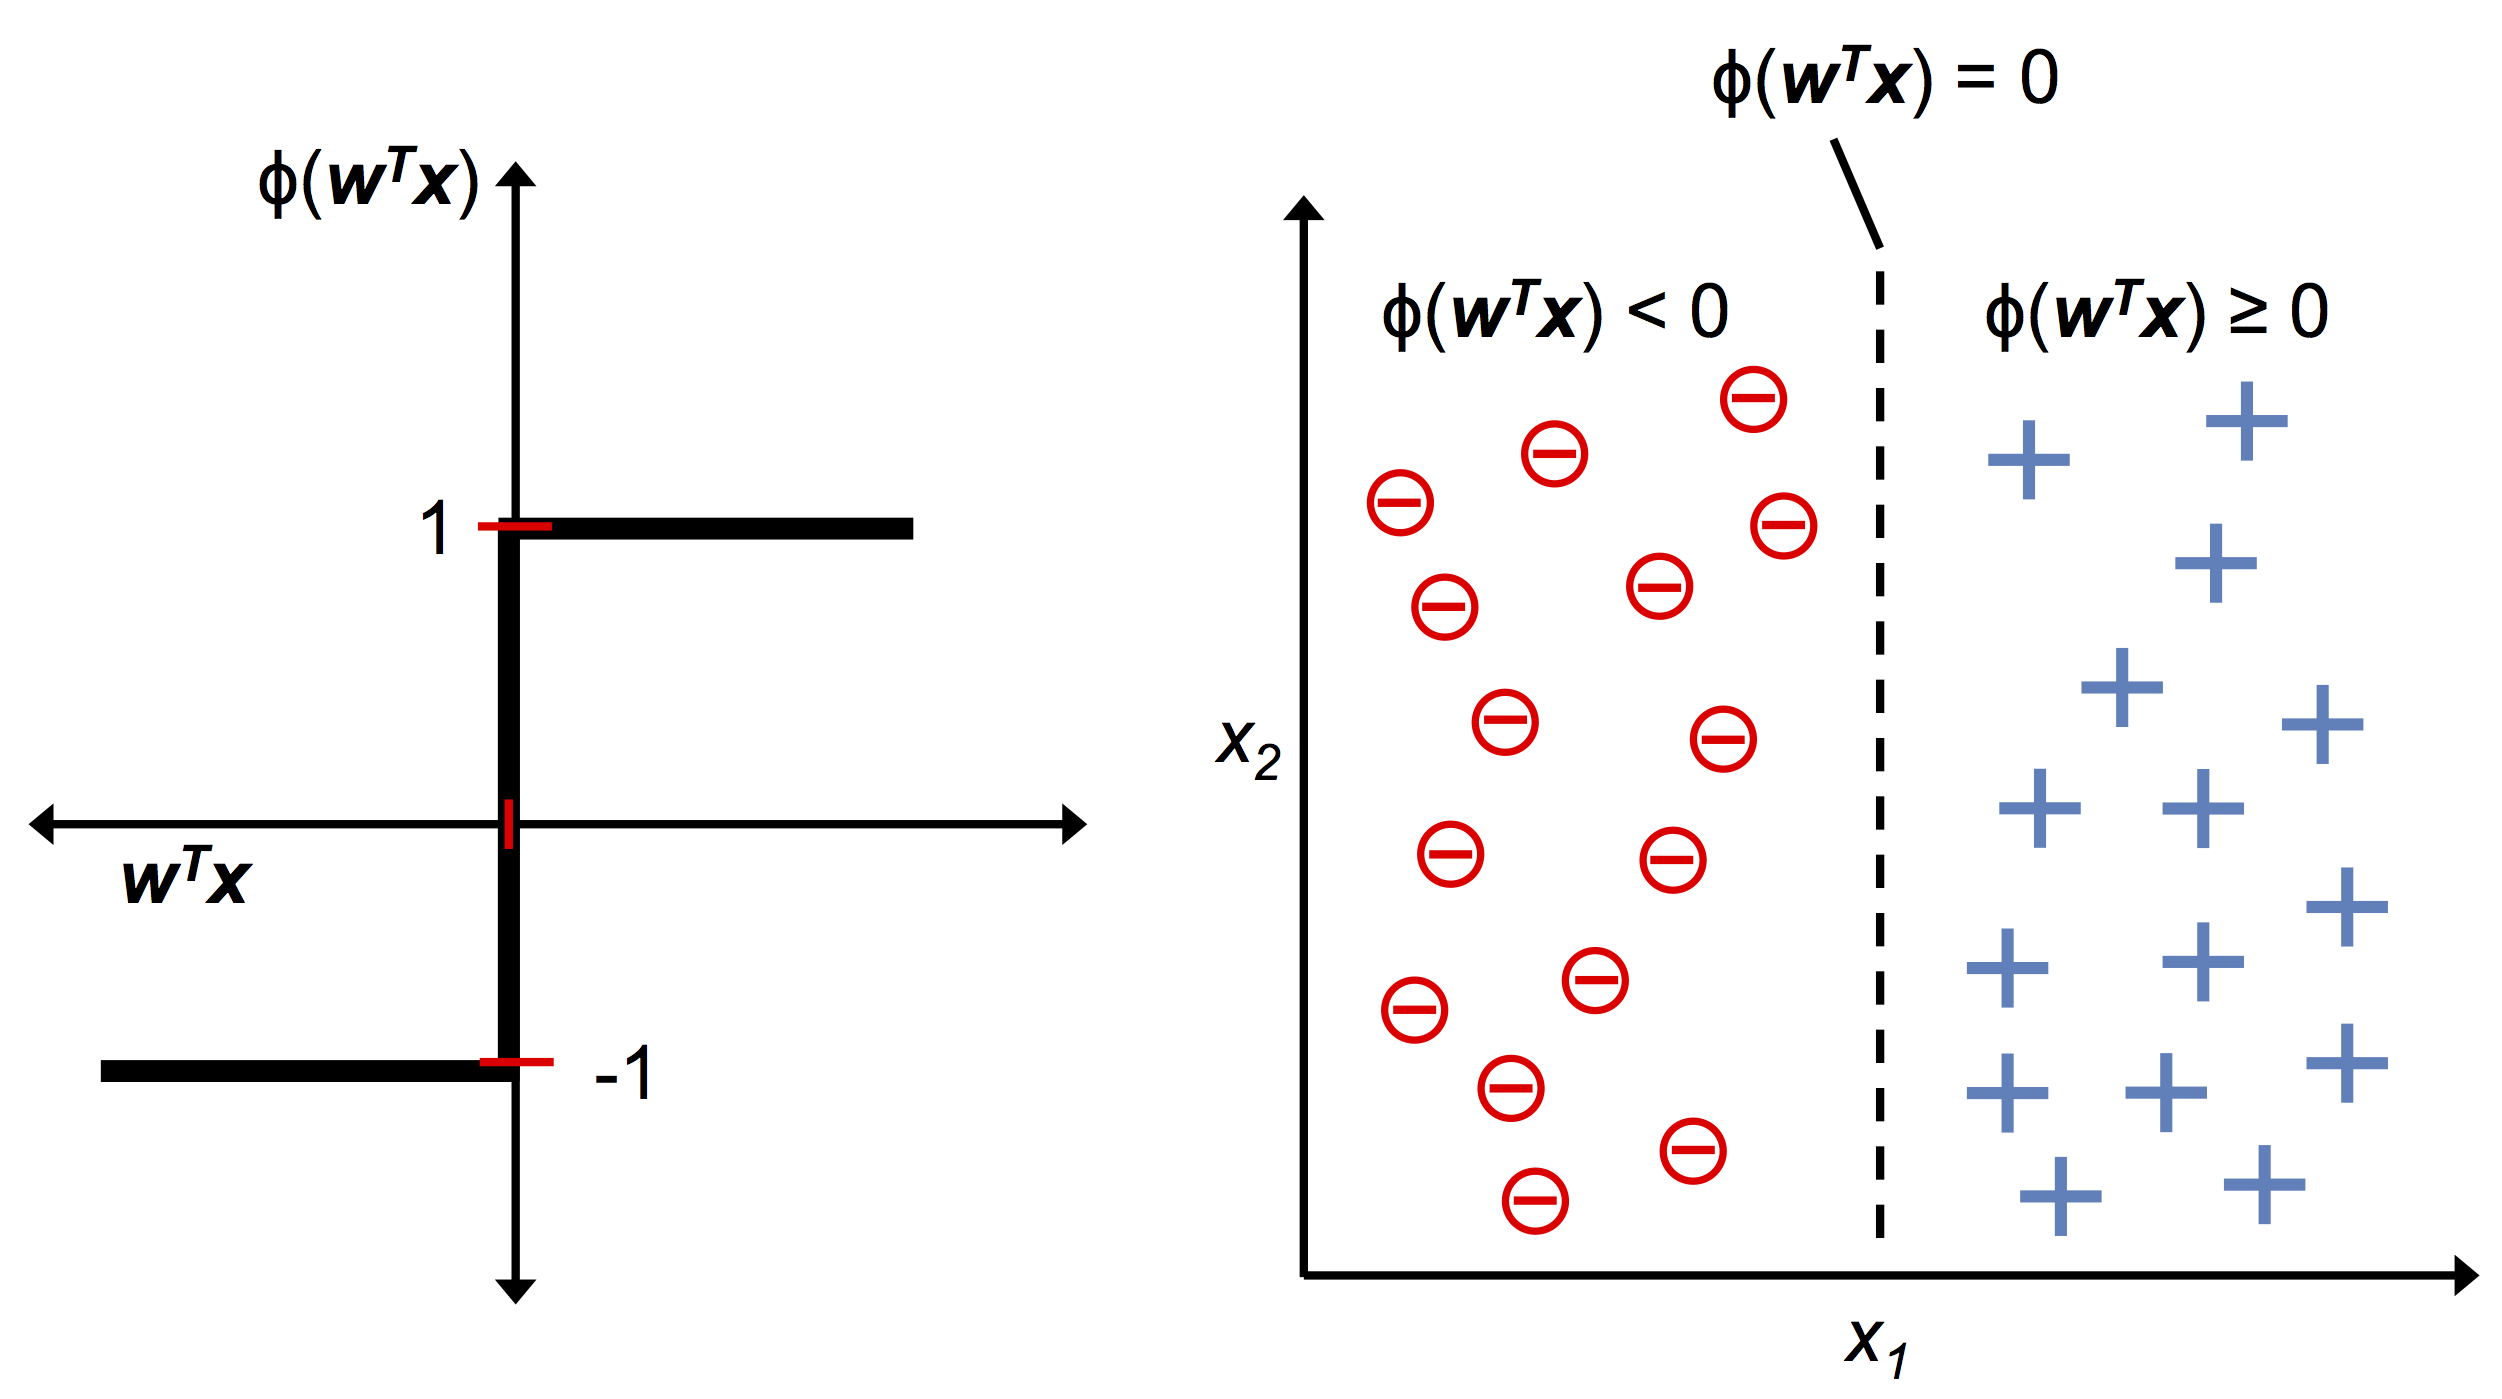
</div>

Agora, se a entrada de uma amostra particular $x^i$ for maior do que um limite definido θ,
prevemos a classe 1 e, caso contrário, a classe -1. No algoritmo perceptron, a função de decisão
$\theta$ é uma variante de uma função **unit step**:

$$\phi(z)= \begin{cases} 
1,  z \geq 0 \\  -1, cc  \end{cases} $$


### Nota 

A partir de aqui vamos usar a seguinte notação para z. 

$$z =  w_1 \times x_1+ \dots + w_m \times x_m = \sum\limits_{j=0}^{m} \boldsymbol{x_jw_j} =  \boldsymbol{w^Tx}$$

Vejam que o sínbolo sobrescrito $\boldsymbol{^T}$ designa a operação de álgebra linear de transposição. Nessa operação as colunas de uma matriz (ou vetor) viram  linhas e vice-versa. 

## Perceptron

O perceptron é o tipo mais simples de rede neural feedforward: um classificador linear. O modelo perceptron usa uma abordagem reducionista para imitar como um único neurônio no cérebro funciona: ou dispara ou não. Assim, a regra perceptron inicial é bastante simples e pode ser resumida pelas seguintes etapas:

1. Inicialize os pesos para 0 ou pequenos números aleatórios.

2. Para cada amostra de treinamento $ \boldsymbol{x^{(i)}}$:

    a. Calcule o valor de saída $\stackrel{\text{^}}{y}$
    
    b. Atualize os pesos
    
- O valor de saída é o valor da classe predita pela função **unit step** definida anteriormente. A cada etapa, cada peso  $\boldsymbol{w_j}$ é atualizado, como descrito abaixo:

$$ \boldsymbol{w_j} = \boldsymbol{w_j} +  \Delta w$$ 

- O valor de $\Delta w$ é calculado pela regra do Perceptron $\Delta w = \eta ( y_{i} - \stackrel{\text{^}}{y}_{i}) x_j^{(i)}$. 
- Chamamos $\eta$ de taxa de aprendizado e geralemente é uma constante entre 0.0 e 1.0
- $y_{i}$ é a classe verdadeira 
- $\stackrel{\text{^}}{y}_{i}$ é a classe predita
- Note também que todos os pesos do vetor  $\boldsymbol{w_j}$ são alterados simultâneamente


#### Convergência do Perceptron

É importante notar que a convergência do perceptron só é garantida se as duas classes são linearmente separáveis e a taxa de aprendizagem é suficientemente pequena. Se as duas classes não podem ser separadas por um limite de decisão linear, podemos definir um máximo número de passagens sobre o conjunto de dados de treinamento (épocas) e/ou um limite para o
número de erros de classificação tolerados - aso contrário, o perceptron nunca parava de atualizar os pesos c:


<div>
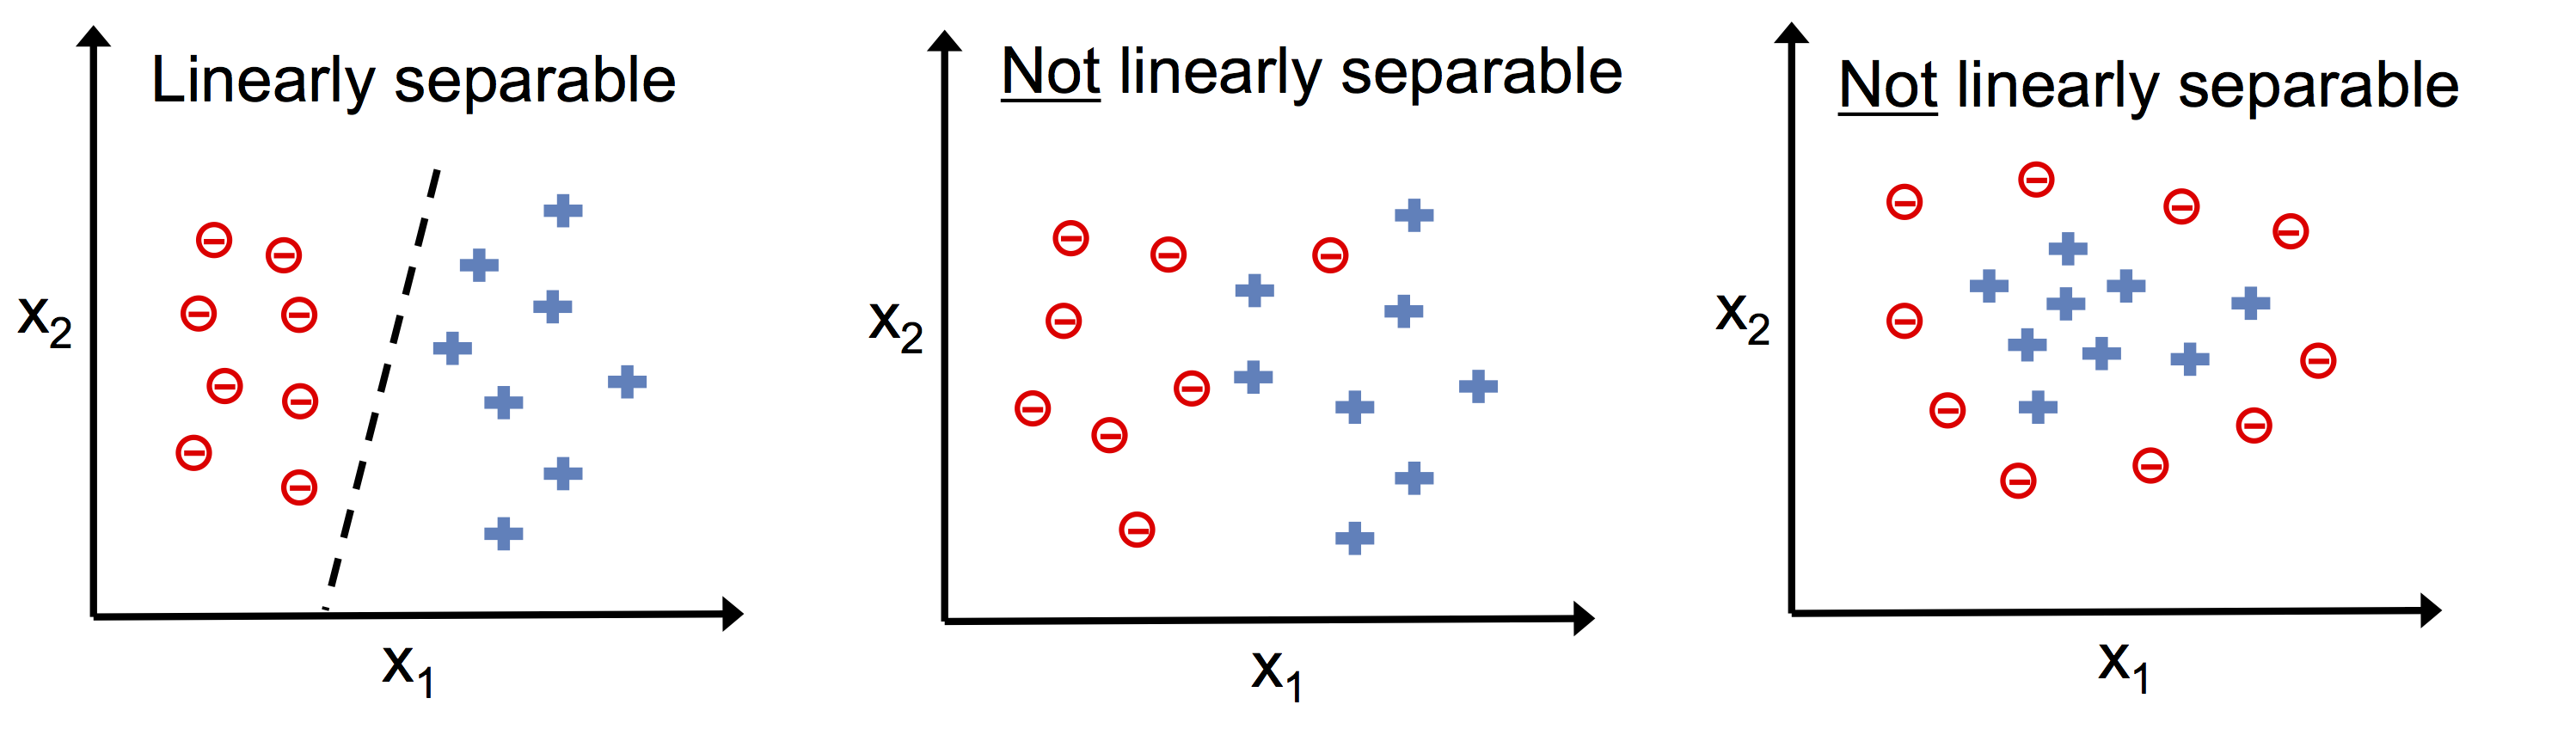
</div>

#### Arquitetura do perceptron

A imagem abaixo resumo a arquitetura do perceptron


<div>
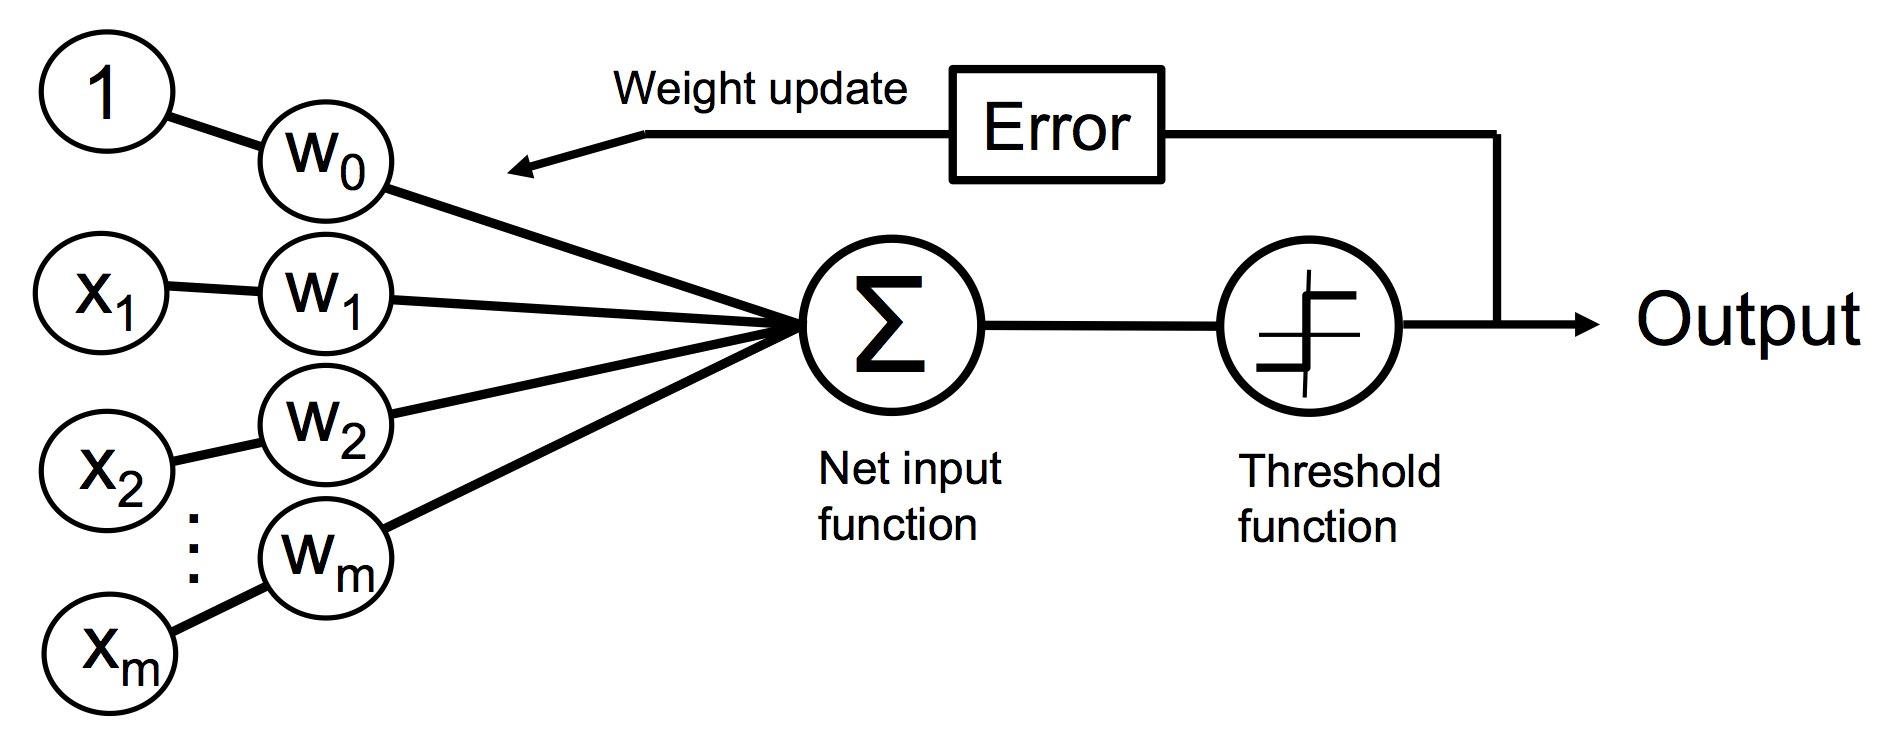
</div>

<br>
<br>

# Implementação do algortimo perceptron em em Python

In [ ]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

<br>
<br>

## Treinando o modelo perceptron com o iris-dataset

...

### Reading-in the Iris data

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

<hr>

### Note:


You can find a copy of the Iris dataset (and all other datasets used in this book) in the code bundle of this book, which you can use if you are working offline or the UCI server at https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data is temporarily unavailable. For instance, to load the Iris dataset from a local directory, you can replace the line 

    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
 
by
 
    df = pd.read_csv('your/local/path/to/iris.data', header=None)


In [ ]:
#df = pd.read_csv('iris.data', header=None)
#df.tail()

<hr>

### Plotando os dados

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

<br>
<br>

### Trainando o modelo perceptron

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

<br>
<br>

### Plotando as regiões de decisão

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

<br>
<br>

## Neuronios lineares adaptativos (Adaline) e convergência de aprendizado


A principal diferença entre a regra Adaline (também conhecida como regra Widrow-Hoff) e o perceptron (de Rosenblatt) é que os pesos são atualizados com base em uma função de ativação em vez de uma função de etapa unitária como no perceptron. No Adaline esta função de ativação linear $\theta(z)$ simplesmente a função de identidade da entrada, de modo que  
$$\phi(\boldsymbol{w^Tx})= \boldsymbol{w^Tx}$$


Embora a função de ativação linear seja usada para aprender os pesos, ainda usamos uma função de limite para fazer a previsão final, que é semelhante à etapa da unidade função que vimos anteriormente. 

As principais diferenças entre o perceptron e o algoritmo Adaline são destacadas na figura a seguir:


<div>
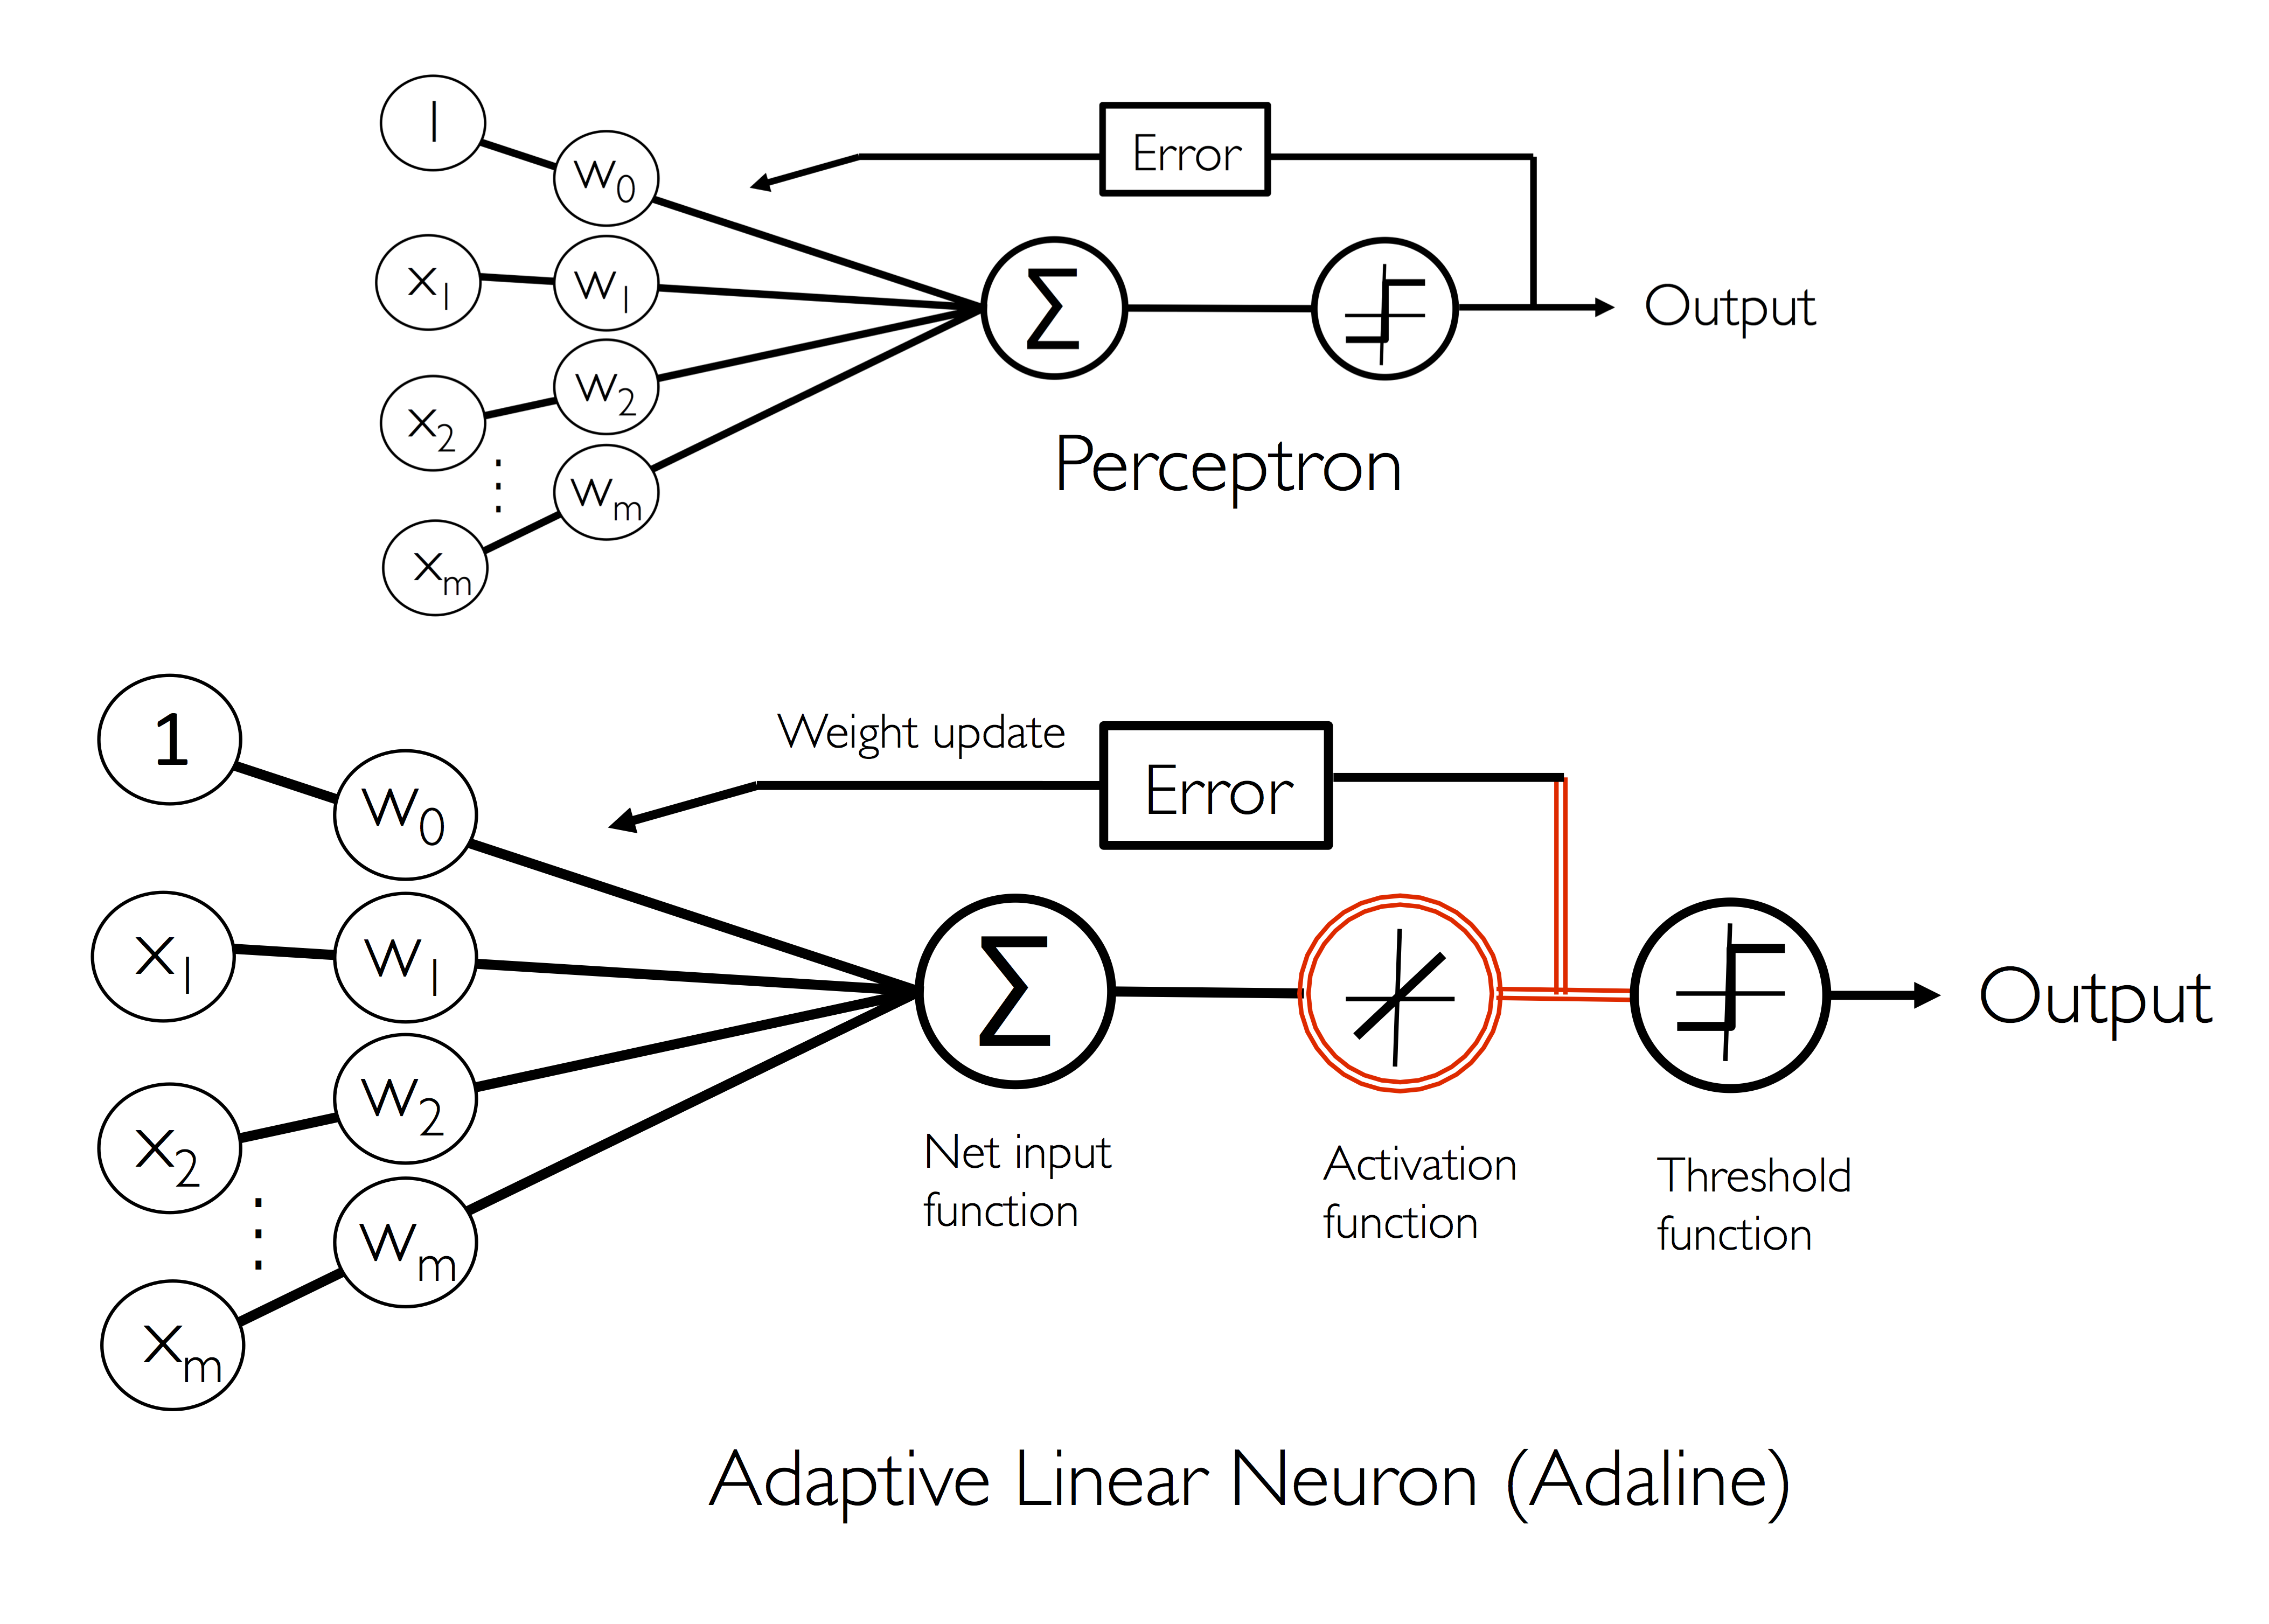
</div>

## Minimizando as funções de custo com gradiente descendent

Um dos principais ingredientes dos algoritmos de aprendizado de máquina supervisionado é uma função objetivo que deve ser otimizada durante o processo de aprendizagem. Este objetivo geralmente é uma função de custo que desejamos minimizar. No caso do Adaline, podemos definir a função de custo $J$ para aprender os pesos,  como a Soma dos Erros Quadrados
(SSE) entre o resultado calculado e o rótulo da classe verdadeira:

$$ J(\boldsymbol{w}) = \frac{1}{2} \sum\limits_{i}(y^{(i)} - \phi(z^{(i)}))^2$$


** Nota: o termo 1/2 é usado por conveniência para facilitar derivar o gradiente

<div>
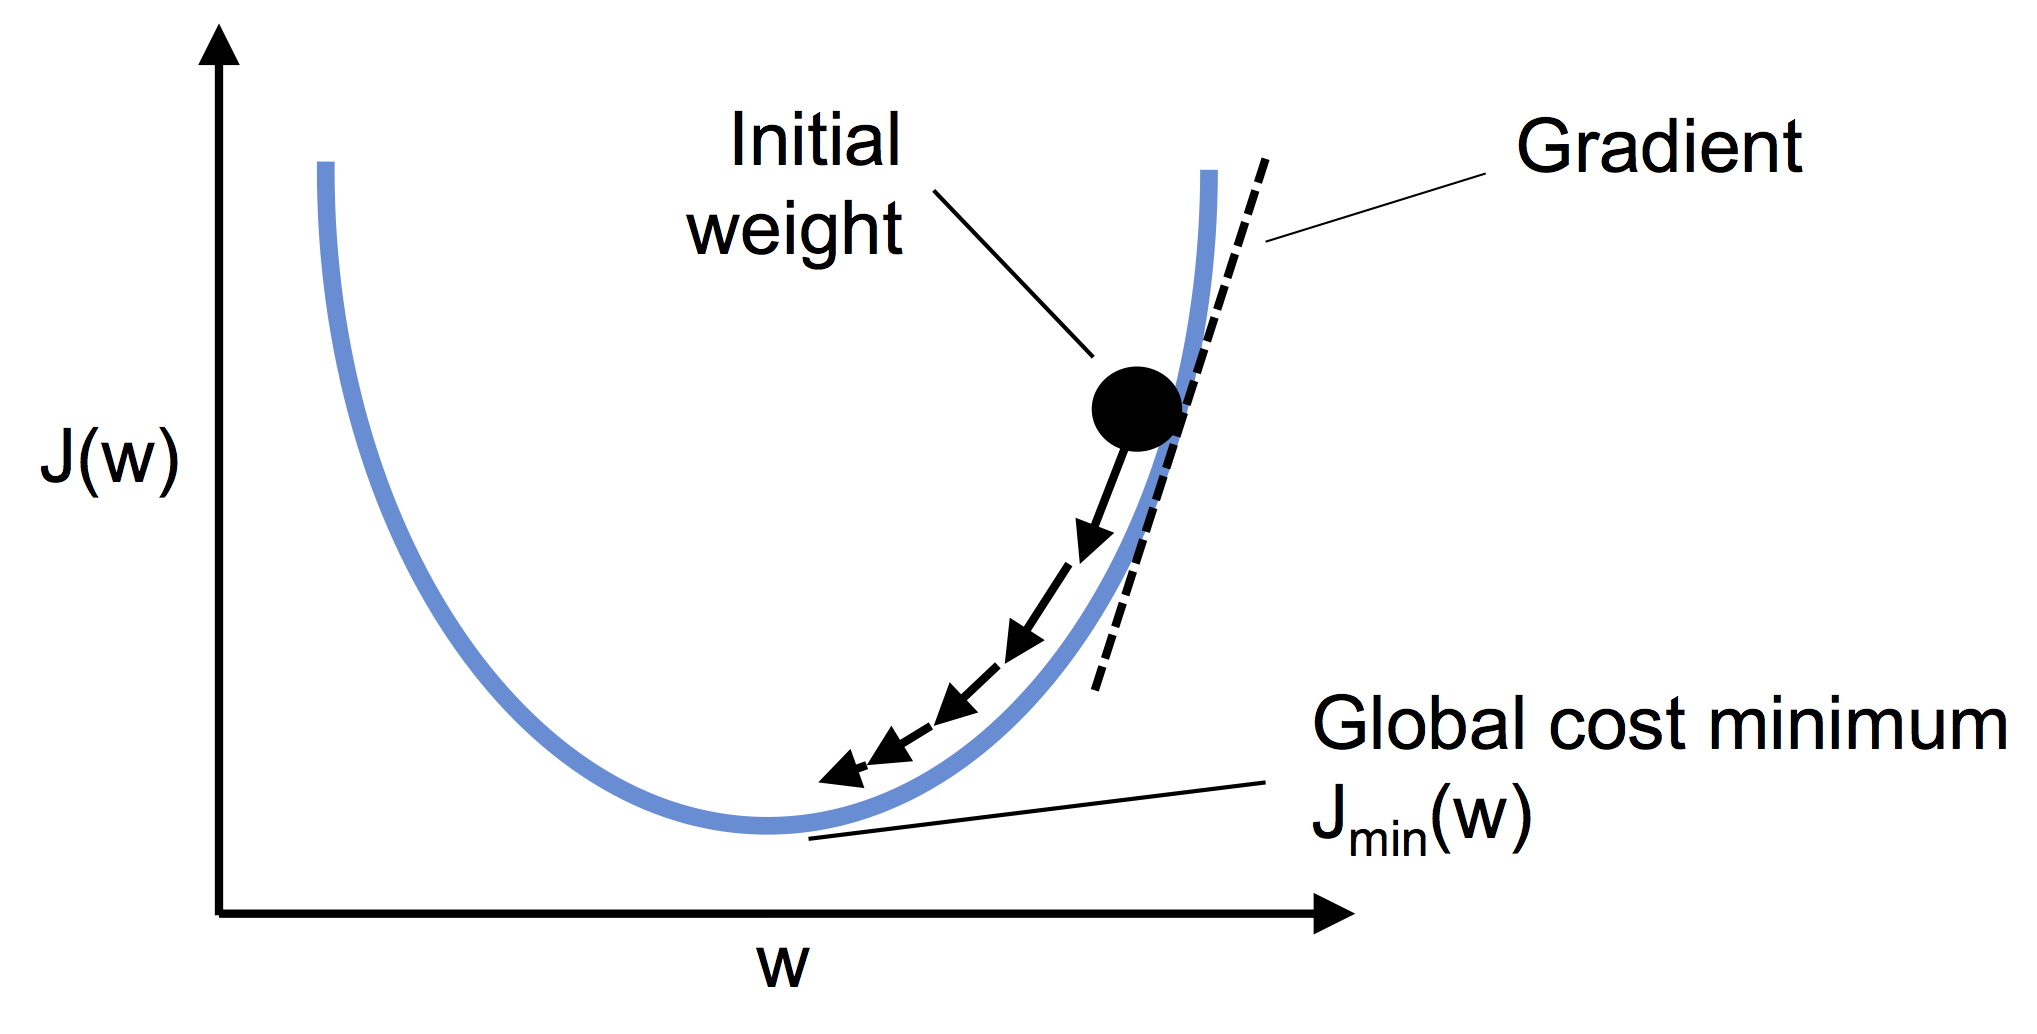
</div>

### Diferença entre Adeline e perceptron

- Embora a regra de aprendizado Adaline pareça idêntica à regra do perceptron, devemos notar que $\phi(z^{(i)})$ com $z^{(i)} = \boldsymbol{w}^{(T)}\boldsymbol{x}^{(i)}$ é um número real e não um rótulo de classe inteiro.

- A atualização de peso é calculada com base em todas as amostras no conjunto de treinamento (em vez de atualizar os pesos incrementalmente após cada amostra), é por isso que abordagem também é conhecida como **batch gradient descent**

<br>
<br>

## Implementação Adaline

In [ ]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

A figura a seguir ilustra o que pode acontecer se alterarmos o valor de um
parâmetro de peso específico para minimizar a função de custo J. A subfigura esquerda
ilustra o caso de uma taxa de aprendizagem bem escolhida, onde o custo diminui gradualmente,
movendo-se na direção do mínimo global. A subfigura à direita, no entanto,
ilustra o que acontece se escolhermos uma taxa de aprendizagem que é muito grande - ultrapassamos
o mínimo global:

<div>
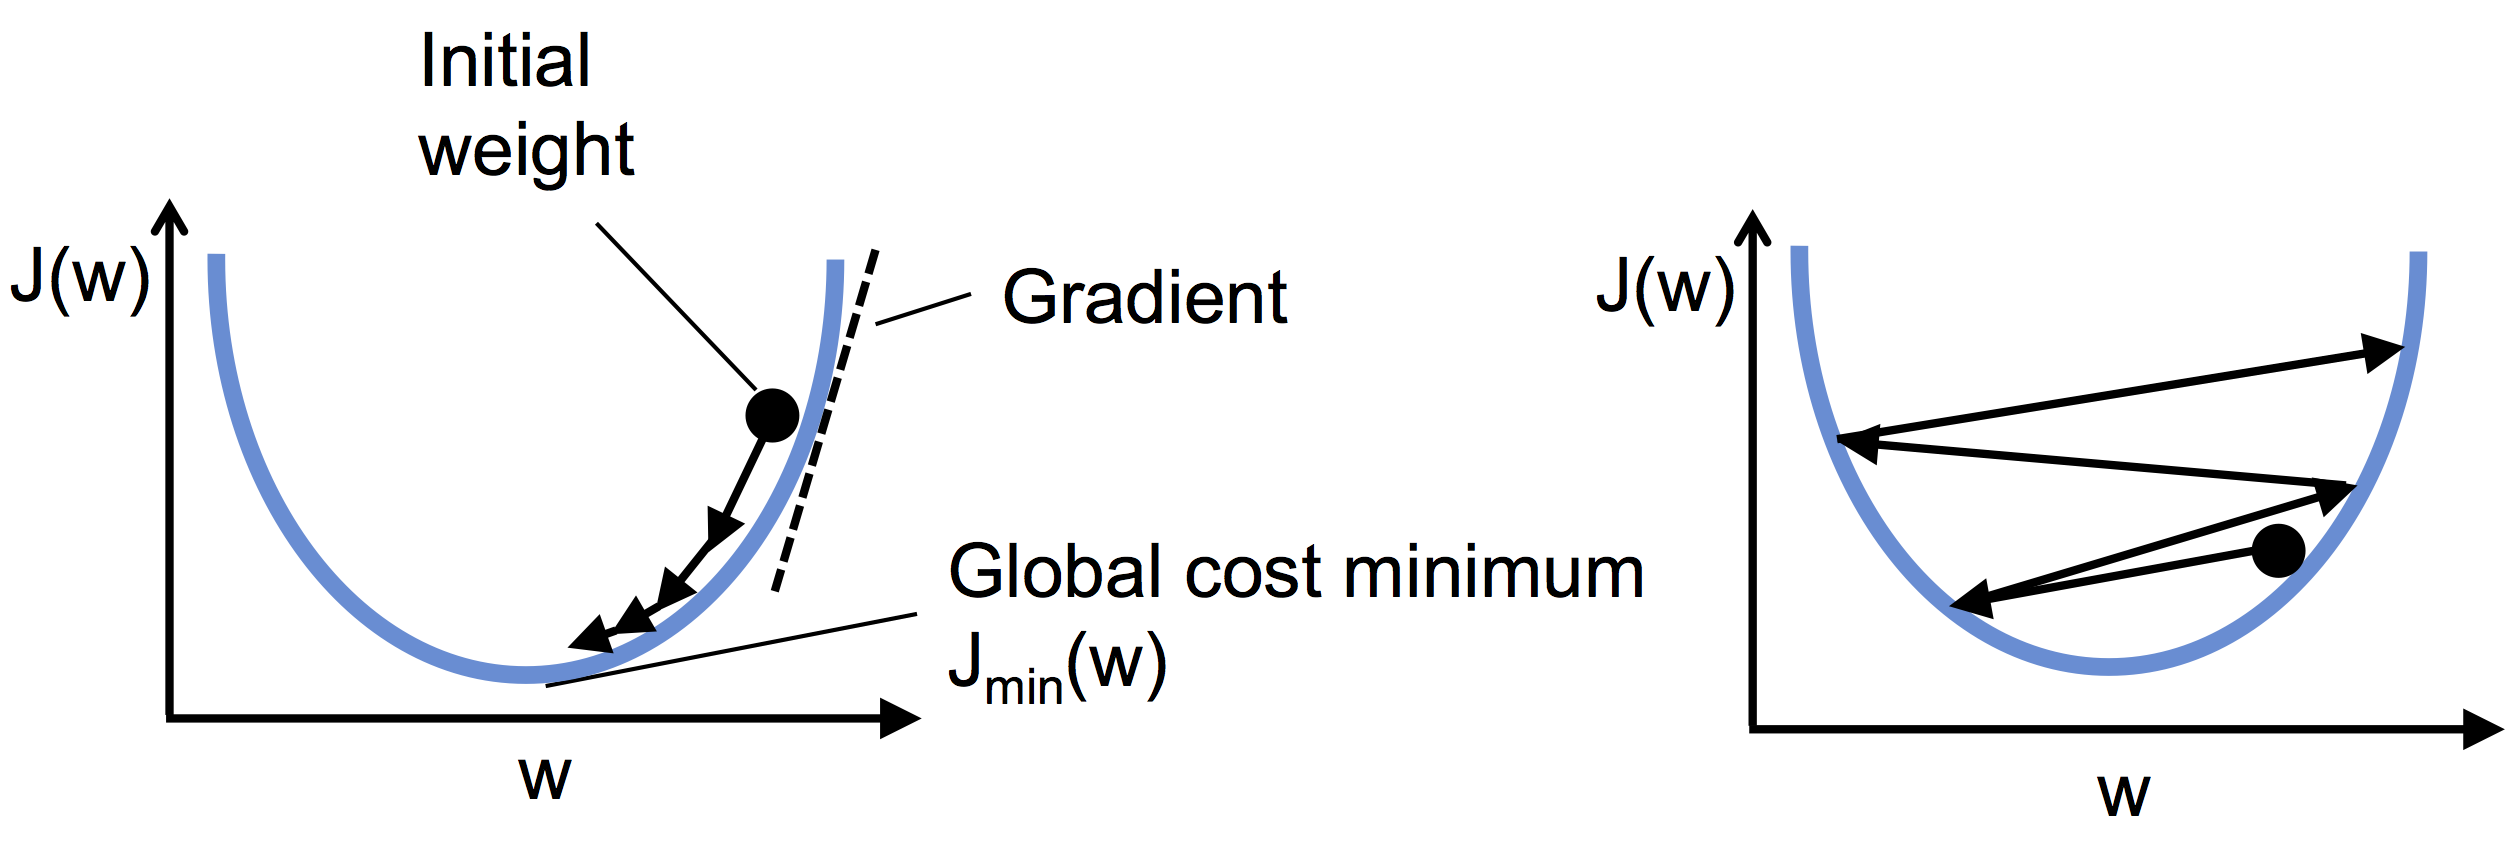
</div>

<br>
<br>

## Melhoria do gradiente descendente por padronização de atributos 'standardization'

O gradiente descendente é um dos muitos algoritmos que se beneficiam do dimensionamento de atributos.
O método de padronização dá aos nossos dados a propriedade de uma distribuição normal padrão, o que ajuda o gradiente
a convergir mais rapidamente. A padronização muda a média de cada recurso para que seja centralizado em zero e cada recurso tenha um desvio padrão de 1.

Uma das razões pelas quais a padronização ajuda no aprendizado de gradiente descendente é que o otimizador precisa passar por menos etapas para encontrar uma solução boa ou ideal (o custo mínimo global), conforme ilustrado na figura a seguir, onde as subfiguras representam a superfície de custo como uma função de dois pesos de modelo em um bidimensional
problema de classificação:


<div>
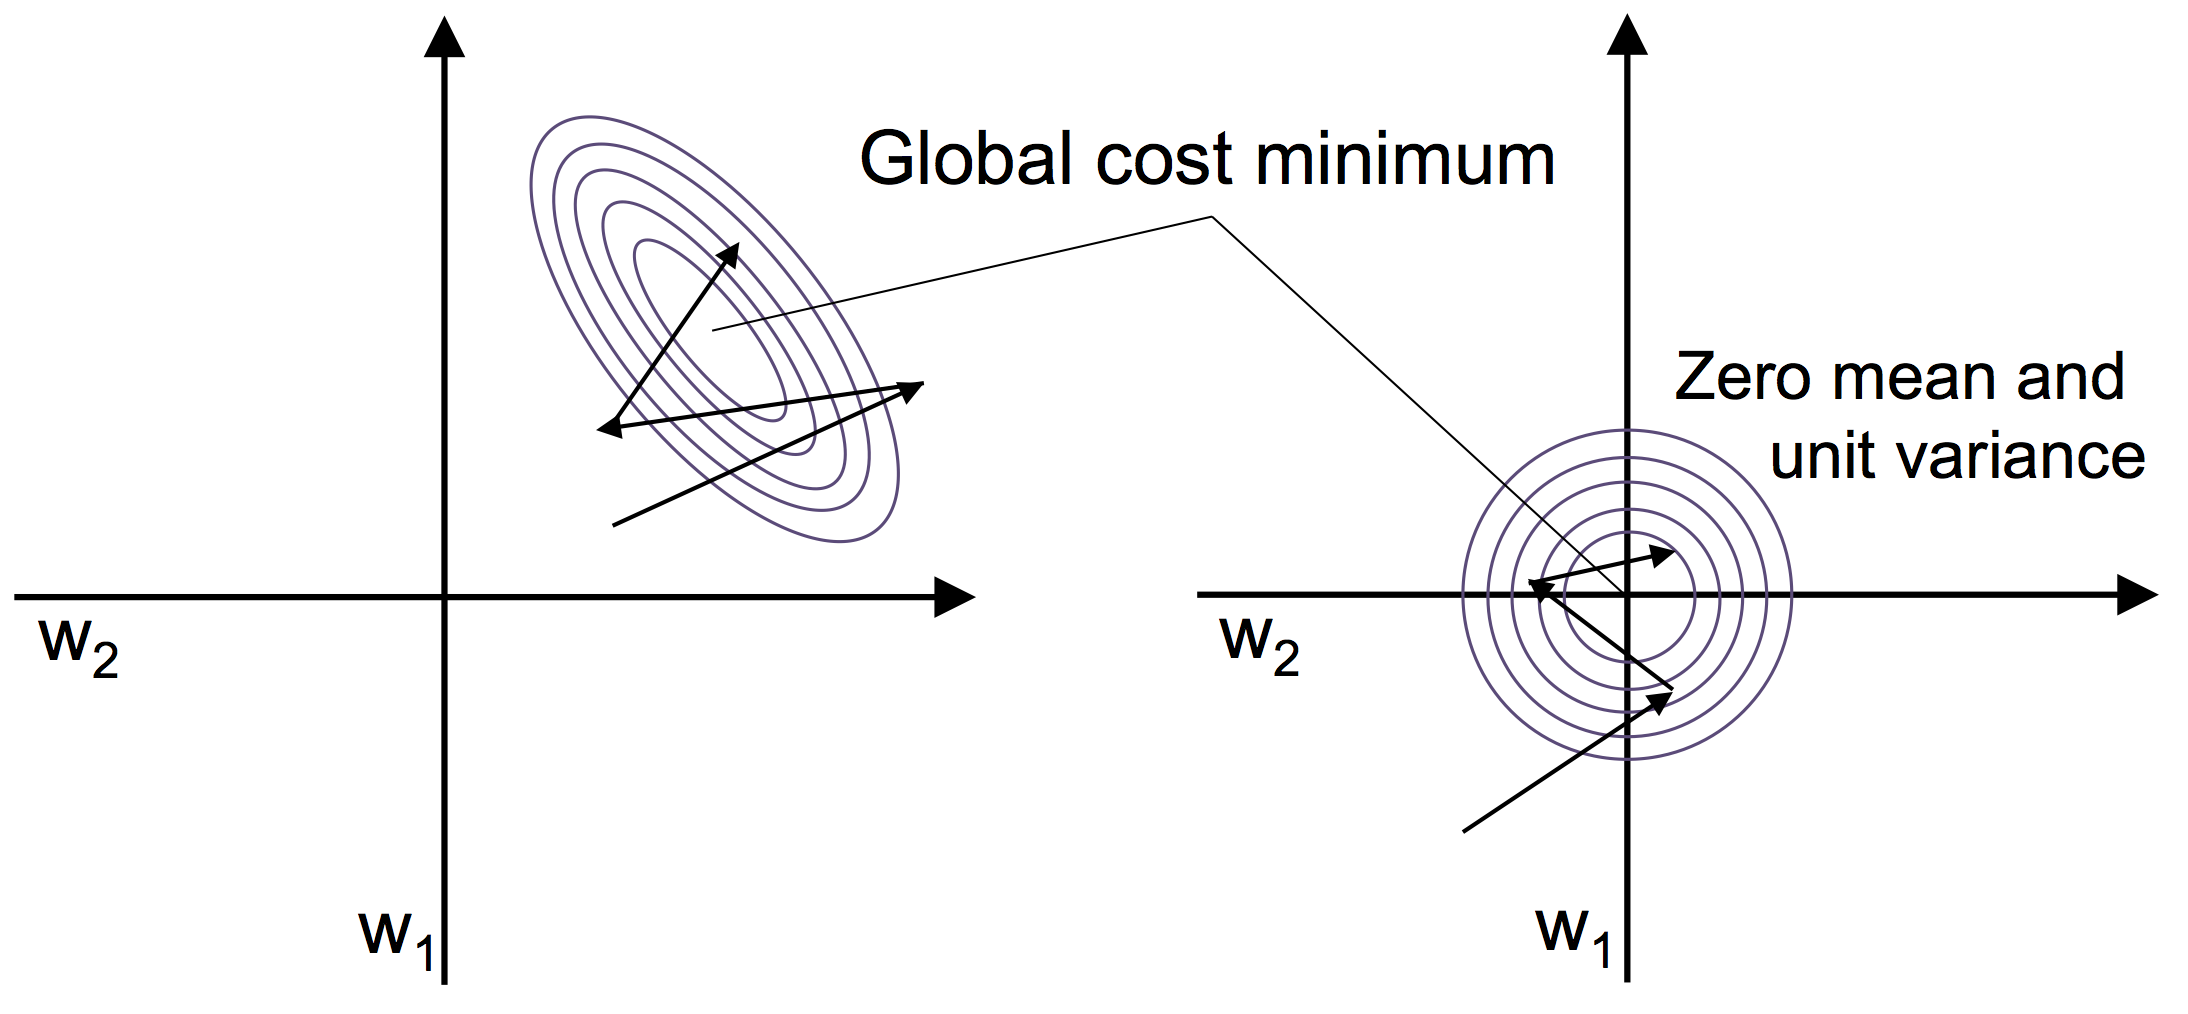
</div>

In [ ]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [ ]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

<br>
<br>

## Dados em larga escala e gradiente descendente estocástico

Imagine que temos um conjunto de dados muito grande com milhões de pontos de dados, o que não é incomum em muitos aplicações de aprendizado de máquina. Gradiente descendente em batch pode ser computacionalmente muito caro em tais cenários, uma vez que precisamos reavaliar o todo o conjunto de dados de treinamento cada vez que damos um passo em direção ao mínimo global.

Uma alternativa popular para o algoritmo de gradiente descendente estocástico, às vezes também chamado de iterativo ou online. Em vez de atualizar os pesos com base na soma dos erros acumulados em todas as amostras, atualizamos os pesos incrementalmente para cada amostra de treinamento.

Um meio-termo entre gradiente descentende em **batch** e **estocástico** é chamada de aprendizagem em **mini batch**. **Mini batch**  pode ser entendido como a aplicação do gradiente descendente para subconjuntos menores dos dados de treinamento.

In [ ]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [ ]:
ada.partial_fit(X_std[0, :], y[0])

### Exercício

Utilize agora a implementação do scikit-learn da rede  perceptron para o dataset do exemplo utilizando from StandardScaler no pré-processamento e avaliação usando holdout 70/30.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron



<br>
<br>

**Referencias** 

*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Adaptado de Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)